# Modelo predicción volumen pasajeros

<hr>

## Librerías

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<hr>

## Dataset

In [ ]:
df_original = pd.read_csv('/work/Filghts TEC_Valid.csv')
# Se crea una copia para no alterar el dataset original
df24 = df_original.copy()
df24.tail(10)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
245743,cfc4784985ef557b9d91dd5563ee5d26,NaN,AO,BT,Playa,Ciudad Principal,2024-06-11 06:05:00,2024-06-11 09:55:00,186,NaN,NaN
245744,a0ee9f7974186536fc197f59353a6442,XA-VAE,AO,BT,Playa,Ciudad Principal,2024-03-21 06:20:00,2024-03-21 10:10:00,186,NaN,NaN
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0
245746,ab5bb628f7e10e2d8fbdf9e15de7bf4a,NaN,BA,BT,Playa,Ciudad Principal,2024-10-01 11:55:00,2024-10-01 15:10:00,186,NaN,NaN
245747,90d2cab80b7700b5d854ae393678144b,XA-VYA,BA,BT,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156.0,61.0
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0
245749,ef32da2731db80faa8b9f5030979a016,9H-MLV,AW,BT,Playa,Ciudad Principal,2024-04-20 10:45:00,2024-04-20 14:00:00,178,NaN,NaN
245750,9c8970e9836d9c5ef9415bfa93c3f408,XA-VAC,AT,BT,Playa,Ciudad Principal,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,95.0
245751,3c15779202b13158f78e8a8afe377250,NaN,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN,NaN
245752,20304ab7212bbbe6c77cdc852d4f8d19,NaN,BA,BT,Playa,Ciudad Principal,2024-05-23 11:25:00,2024-05-23 14:40:00,240,NaN,NaN


<hr>

## Limpieza de datos

### Datos duplicados

In [ ]:
df24['Flight_ID'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
245748    False
245749    False
245750    False
245751    False
245752     True
Name: Flight_ID, Length: 245753, dtype: bool

In [ ]:
df24[df24['Flight_ID']=='20304ab7212bbbe6c77cdc852d4f8d19']

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
175464,20304ab7212bbbe6c77cdc852d4f8d19,NaN,BM,BA,Ciudad Principal,Ciudad Fronteriza,2024-05-23 06:10:00,2024-05-23 10:35:00,240,NaN,NaN
245752,20304ab7212bbbe6c77cdc852d4f8d19,NaN,BA,BT,Playa,Ciudad Principal,2024-05-23 11:25:00,2024-05-23 14:40:00,240,NaN,NaN


<hr>

### Valores nulos

In [ ]:
df24.isna().sum()

Flight_ID                0
Aeronave             80390
DepartureStation         1
ArrivalStation           1
Destination_Type         1
Origin_Type              1
STD                      0
STA                      0
Capacity                 0
Passengers          123525
Bookings            123525
dtype: int64

In [ ]:
(~df24.isna()).sum()

Flight_ID           245753
Aeronave            165363
DepartureStation    245752
ArrivalStation      245752
Destination_Type    245752
Origin_Type         245752
STD                 245753
STA                 245753
Capacity            245753
Passengers          122228
Bookings            122228
dtype: int64

In [ ]:
df=df24.dropna()
df

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166.0,89.0
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0
245747,90d2cab80b7700b5d854ae393678144b,XA-VYA,BA,BT,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156.0,61.0
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0


<hr>

## Transformación de datos

### Datetime

In [ ]:
# El tipo de dato de las columnas STD y STA es object cuando debería de ser datetime
df['STD'] = pd.to_datetime(df['STD'])
df['STA'] = pd.to_datetime(df['STA'])
df

/tmp/ipykernel_82/2026129870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STD'] = pd.to_datetime(df['STD'])
/tmp/ipykernel_82/2026129870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STA'] = pd.to_datetime(df['STA'])


,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166.0,89.0
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0
245747,90d2cab80b7700b5d854ae393678144b,XA-VYA,BA,BT,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156.0,61.0
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0


### Valores flotantes

In [ ]:
# Los pasajeros y bookings aparecen como tipo flotante, por lo tanto vamos a revisar esos registros
registros_flotantes = df[df['Passengers'].apply(lambda x: isinstance(x, float))]
print(registros_flotantes)

# Se observa que los valores en realidad son enteros pues son x.0, por lo tanto, se transforman a enteros.
df['Passengers'] = df['Passengers'].astype(int)
df['Bookings'] = df['Bookings'].astype(int)
df

/tmp/ipykernel_82/70781299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Passengers'] = df['Passengers'].astype(int)
/tmp/ipykernel_82/70781299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bookings'] = df['Bookings'].astype(int)
                               Flight_ID Aeronave DepartureStation  \
0       ab954014077430bd842cfa305a55c0f8   XA-VBY               AT   
1       efd86c996035dacdca7a0ccb2560dda1   XA-VIX               BM   
3       dd0fad3248951d2f71d63e6279aeaa4b   XA-VBW   

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166,89
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142,54
245747,90d2cab80b7700b5d854ae393678144b,XA-VYA,BA,BT,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156,61
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189,86


### Encoding Departure y Arrival

In [ ]:

dict_departure=dict(zip(df['DepartureStation'],pd.factorize(df['DepartureStation'])[0]+1))
dict_departure

{'AT': 1,
 'BM': 2,
 'AW': 3,
 'BA': 4,
 'AJ': 5,
 'AO': 6,
 'AK': 7,
 'BH': 8,
 'AY': 9,
 'BN': 10,
 'AF': 11,
 'AU': 12,
 'AD': 13,
 'BD': 14,
 'AR': 15,
 'BJ': 16,
 'BC': 17,
 'BP': 18,
 'BG': 19,
 'BL': 20,
 'BQ': 21,
 'AL': 22,
 'AB': 23,
 'BF': 24,
 'BO': 25,
 'AP': 26,
 'BT': 27,
 'BE': 28,
 'BB': 29,
 'AZ': 30,
 'AI': 31,
 'AQ': 32,
 'BS': 33,
 'AX': 34,
 'AE': 35,
 'AV': 36,
 'AS': 37,
 'AM': 38,
 'BK': 39,
 'BI': 40,
 'AC': 41}

In [ ]:
df_exp=df.copy()
df_exp['DepartureStation']=df_exp['DepartureStation'].map(dict_departure)
df_exp['ArrivalStation']=df_exp['ArrivalStation'].map(dict_departure)
df_exp.iloc[:,2:4]
df_exp

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,1,30,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,2,36,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,3,37,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,4,23,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,5,15,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,6,27,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166,89
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,3,27,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142,54
245747,90d2cab80b7700b5d854ae393678144b,XA-VYA,4,27,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156,61
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,2,27,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189,86


In [ ]:
df_exp['new_col']=df_exp.iloc[:,2:4].apply(lambda x: str(x['DepartureStation']).zfill(2)+str(x['ArrivalStation']).zfill(2),axis=1)
df['DepartureStation']=df_exp['new_col']
df['ArrivalStation']=df_exp['new_col']
df=df.rename(columns={'DepartureStation':'Ruta','ArrivalStation':'Ruta Str'})
df['Ruta']=df['Ruta'].astype(int)
df

/tmp/ipykernel_82/1745980684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DepartureStation']=df_exp['new_col']
/tmp/ipykernel_82/1745980684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ArrivalStation']=df_exp['new_col']


,Flight_ID,Aeronave,Ruta,Ruta Str,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,130,0130,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,236,0236,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,337,0337,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,423,0423,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,515,0515,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,627,0627,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166,89
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,327,0327,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142,54
245747,90d2cab80b7700b5d854ae393678144b,XA-VYA,427,0427,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156,61
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,227,0227,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189,86


### Encoding Aeronave

In [ ]:
dict_aeronave=dict(zip(df['Aeronave'],pd.factorize(df['Aeronave'])[0]+1))
dict_aeronave

{'XA-VBY': 1,
 'XA-VIX': 2,
 'XA-VBW': 3,
 'XA-VAP': 4,
 'XA-VXC': 5,
 'XA-VAM': 6,
 'XA-VBK': 7,
 'XA-VXL': 8,
 'XA-VBR': 9,
 'XA-VBN': 10,
 'XA-VII': 11,
 'XA-VYB': 12,
 'XA-VIS': 13,
 'XA-VAC': 14,
 'XA-VIJ': 15,
 'XA-VIQ': 16,
 'XA-VAY': 17,
 'XA-VBU': 18,
 'XA-VIE': 19,
 'XA-VBQ': 20,
 'XA-VXE': 21,
 'XA-VBI': 22,
 'XA-VAI': 23,
 'XA-VIL': 24,
 'XA-VAV': 25,
 'XA-VXD': 26,
 'XA-VIM': 27,
 'XA-VAT': 28,
 'XA-VAW': 29,
 'XA-VAX': 30,
 'XA-VXM': 31,
 'XA-VIK': 32,
 'XA-VIN': 33,
 'XA-VAR': 34,
 'XA-VBS': 35,
 'XA-VAA': 36,
 'XA-VAK': 37,
 'XA-VIA': 38,
 'XA-VIT': 39,
 'XA-VBA': 40,
 'XA-VYE': 41,
 'XA-VBX': 42,
 'XA-VXG': 43,
 'XA-VBT': 44,
 'XA-VXB': 45,
 'XA-VYD': 46,
 'XA-VBM': 47,
 'XA-VXF': 48,
 'XA-VAU': 49,
 'XA-VAN': 50,
 'XA-VBP': 51,
 'XA-VIF': 52,
 'XA-VXH': 53,
 'XA-VAO': 54,
 'XA-VBZ': 55,
 'XA-VAJ': 56,
 'XA-VIO': 57,
 'XA-VYF': 58,
 'XA-VXJ': 59,
 'XA-VYA': 60,
 'XA-VIB': 61,
 'XA-VBV': 62,
 'XA-VIV': 63,
 'XA-VIP': 64,
 'XA-VIH': 65,
 'XA-VBJ': 66,
 'XA-VIU': 67,
 'XA

In [ ]:
df_exp=df.copy()
df_exp['Aeronave']=df_exp['Aeronave'].map(dict_aeronave)
df_exp

,Flight_ID,Aeronave,Ruta,Ruta Str,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,1,130,0130,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157
1,efd86c996035dacdca7a0ccb2560dda1,2,236,0236,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109
3,dd0fad3248951d2f71d63e6279aeaa4b,3,337,0337,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142
4,d0987ee648eea254063bfe2b39571b67,4,423,0423,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90
5,3b5df8805161ea827d2f2e4298c38e06,1,515,0515,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,58,627,0627,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166,89
245745,598035669a4f0fa2ce1207977932df9e,23,327,0327,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142,54
245747,90d2cab80b7700b5d854ae393678144b,60,427,0427,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156,61
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,7,227,0227,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189,86


In [ ]:
df['Aeronave']=df_exp['Aeronave']
df

,Flight_ID,Aeronave,Ruta,Ruta Str,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,1,130,0130,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157
1,efd86c996035dacdca7a0ccb2560dda1,2,236,0236,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109
3,dd0fad3248951d2f71d63e6279aeaa4b,3,337,0337,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142
4,d0987ee648eea254063bfe2b39571b67,4,423,0423,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90
5,3b5df8805161ea827d2f2e4298c38e06,1,515,0515,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,58,627,0627,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166,89
245745,598035669a4f0fa2ce1207977932df9e,23,327,0327,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142,54
245747,90d2cab80b7700b5d854ae393678144b,60,427,0427,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156,61
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,7,227,0227,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189,86


### Encoding destination origin

In [ ]:
dict_destination=dict(zip(df['Destination_Type'],pd.factorize(df['Destination_Type'])[0]+1))
dict_destination

{'Ciudad Fronteriza': 1,
 'MX Amigos y Familia': 2,
 'Playa': 3,
 'Ciudad Principal': 4,
 'Ecoturismo': 5}

In [ ]:
df_exp=df.copy()
df_exp['Destination_Type']=df_exp['Destination_Type'].map(dict_destination)
df_exp['Origin_Type']=df_exp['Origin_Type'].map(dict_destination)
df_exp

,Flight_ID,Aeronave,Ruta,Ruta Str,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,1,130,0130,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157
1,efd86c996035dacdca7a0ccb2560dda1,2,236,0236,2,1,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109
3,dd0fad3248951d2f71d63e6279aeaa4b,3,337,0337,2,4,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142
4,d0987ee648eea254063bfe2b39571b67,4,423,0423,3,4,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90
5,3b5df8805161ea827d2f2e4298c38e06,1,515,0515,3,2,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,58,627,0627,3,4,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166,89
245745,598035669a4f0fa2ce1207977932df9e,23,327,0327,3,4,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142,54
245747,90d2cab80b7700b5d854ae393678144b,60,427,0427,3,4,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156,61
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,7,227,0227,3,1,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189,86


In [ ]:
df['Destination_Type']=df_exp['Destination_Type']
df['Origin_Type']=df_exp['Origin_Type']
df

,Flight_ID,Aeronave,Ruta,Ruta Str,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,1,130,0130,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157
1,efd86c996035dacdca7a0ccb2560dda1,2,236,0236,2,1,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109
3,dd0fad3248951d2f71d63e6279aeaa4b,3,337,0337,2,4,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142
4,d0987ee648eea254063bfe2b39571b67,4,423,0423,3,4,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90
5,3b5df8805161ea827d2f2e4298c38e06,1,515,0515,3,2,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125
...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,58,627,0627,3,4,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166,89
245745,598035669a4f0fa2ce1207977932df9e,23,327,0327,3,4,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142,54
245747,90d2cab80b7700b5d854ae393678144b,60,427,0427,3,4,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156,61
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,7,227,0227,3,1,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189,86


### Encoding Datetime

In [ ]:
df['Mes']=df['STD'].dt.month
df['Dia']=df['STD'].dt.day
df['Dia_semana']=df['STD'].dt.dayofweek
df['Hora']=df['STD'].dt.hour
df.to

,Flight_ID,Aeronave,Ruta,Ruta Str,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Mes,Dia,Dia_semana,Hora
0,ab954014077430bd842cfa305a55c0f8,1,130,0130,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157,10,19,3,11
1,efd86c996035dacdca7a0ccb2560dda1,2,236,0236,2,1,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109,7,3,0,0
3,dd0fad3248951d2f71d63e6279aeaa4b,3,337,0337,2,4,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142,6,26,0,15
4,d0987ee648eea254063bfe2b39571b67,4,423,0423,3,4,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90,2,10,4,8
5,3b5df8805161ea827d2f2e4298c38e06,1,515,0515,3,2,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125,9,7,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,58,627,0627,3,4,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166,89,12,26,1,6
245745,598035669a4f0fa2ce1207977932df9e,23,327,0327,3,4,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142,54,12,28,3,10
245747,90d2cab80b7700b5d854ae393678144b,60,427,0427,3,4,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156,61,12,23,5,11
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,7,227,0227,3,1,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189,86,12,29,4,7


<hr>

## Análisis Explorativo

### Análisis variables categóricas

Rutas más comunes

De este diagrama de pastel podemos observar que la ruta 301 (es decir, la 30-1) es la que más se repite, seguida muy de cerca de la 103 y 701 y la 107. Posterior a esta ruta se da un brinco de varios cientos de veces.

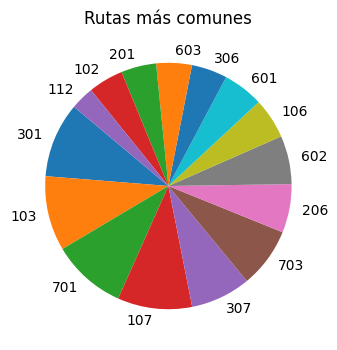

Ruta
301    3778
103    3766
701    3755
107    3754
307    3029
703    3028
206    2444
602    2440
106    2043
601    2042
306    1797
603    1796
201    1770
102    1765
112    1184
Name: count, dtype: int64

In [ ]:
# Rutas más comunes
ruta_counts = df['Ruta'].value_counts()

top_rutas = ruta_counts.head(15)

plt.figure(figsize=(5, 4))
plt.pie(top_rutas, labels=top_rutas.index, startangle=140)
plt.title('Rutas más comunes')
plt.show()
display(top_rutas)

Rutas menos comunes

Esté diagrama muestra las 15 rutas menos comunes, es decir la ruta 2432 (BF-AQ)

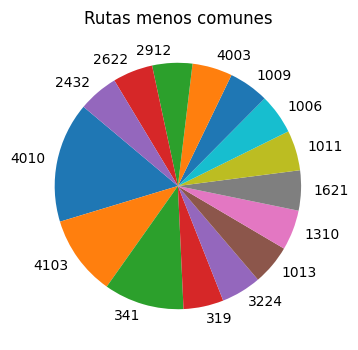

Ruta
4010    3
4103    2
341     2
319     1
3224    1
1013    1
1310    1
1621    1
1011    1
1006    1
1009    1
4003    1
2912    1
2622    1
2432    1
Name: count, dtype: int64

In [ ]:
# Rutas menos comunes
ruta_counts = df['Ruta'].value_counts()

menos_rutas = ruta_counts.tail(15)

plt.figure(figsize=(5, 4))
plt.pie(menos_rutas, labels=menos_rutas.index, startangle=140)
plt.title('Rutas menos comunes')
plt.show()
display(menos_rutas)

Aronaves más usadas

Esté diagrama de pastel muestra las 15 aeronaves más comúnes, siendo la aeronave 43 (XA-VXG) la más utilizada.

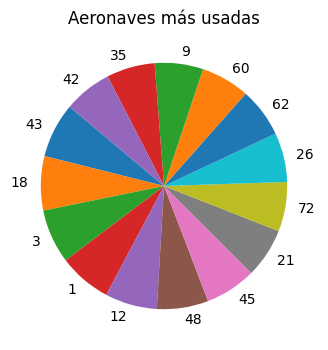

Aeronave
43    2228
18    2198
3     2196
1     2142
12    2112
48    2088
45    2068
21    2015
72    2006
26    2002
62    2000
60    1976
9     1963
35    1963
42    1956
Name: count, dtype: int64

In [ ]:
# Aeronaves más usadas
ruta_counts = df['Aeronave'].value_counts()

top_aeronaves = ruta_counts.head(15)

plt.figure(figsize=(5, 4))
plt.pie(top_aeronaves, labels=top_aeronaves.index, startangle=140)
plt.title('Aeronaves más usadas')
plt.show()
display(top_aeronaves)

Aeronaves menos usadas

Esté diagrama de pastel muestra las 15 aeronaves menos utilizadas, siendo la aeronave 81 (XA-VAB) la menos utilizada.

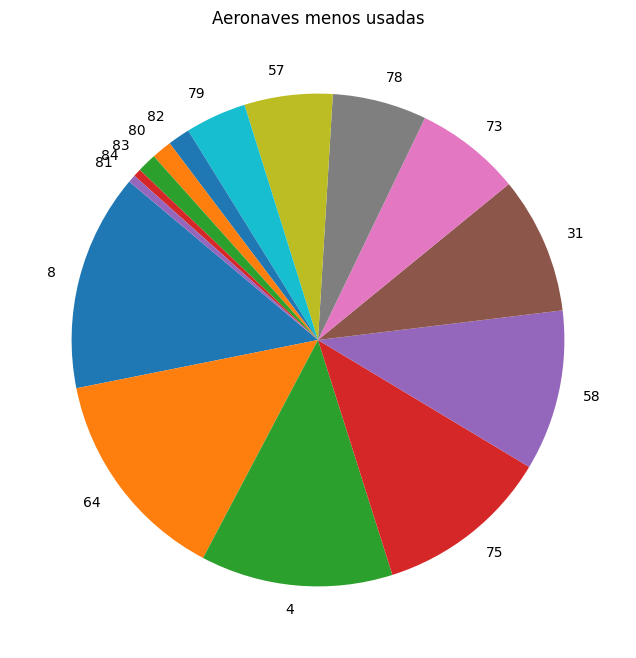

Aeronave
8     882
64    875
4     780
75    712
58    652
31    556
73    430
78    383
57    358
79    248
82     90
80     82
83     78
84     32
81     31
Name: count, dtype: int64

In [ ]:
# Aeronaves menos usadas
ruta_counts = df['Aeronave'].value_counts()

menos_aeronaves = ruta_counts.tail(15)

plt.figure(figsize=(10, 8))
plt.pie(menos_aeronaves, labels=menos_aeronaves.index, startangle=140)
plt.title('Aeronaves menos usadas')
plt.show()
display(menos_aeronaves)

Vuelos por mes

El siguiente diagrama de barras muestra los meses en los que más hubo vuelos en el año, siendo Agosto y Julio los meses con más vuelos y Febero siendo el mes con menos vuelos. Cómo observación los 3 meses con más vuelos tienen 31 días y el mes con menos días es a su vez el mes con menos vuelos del año.

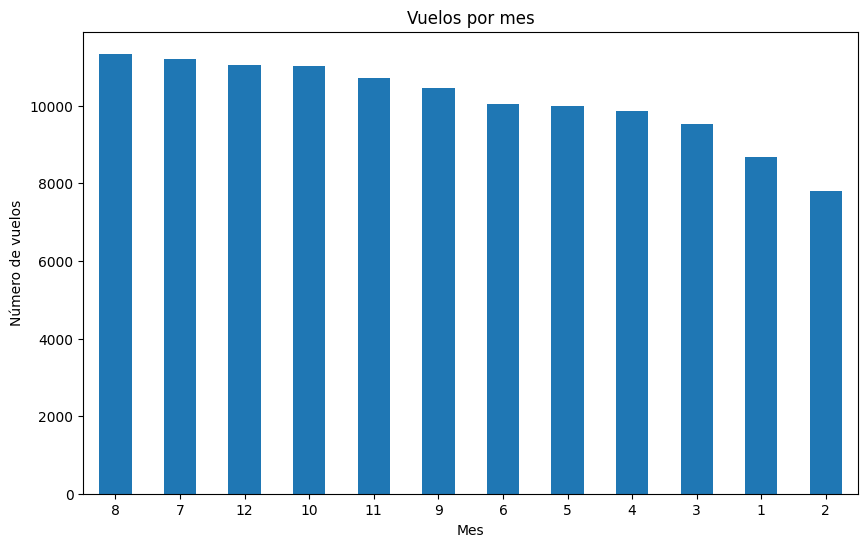

In [ ]:
# Vuelos por mes
frecuencias = df['Mes'].value_counts()
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar')
plt.title('Vuelos por mes')
plt.xlabel('Mes')
plt.ylabel('Número de vuelos')
plt.xticks(rotation=0)
plt.show()

<hr>

### Análisis variables numéricas

Boxplot capacidad

El siguiente diagrama de cajas y bigotes muestra cómo se distribuyen los datos para la variable capacidad, podemos observar que el rango intercuartílico está entre175 y 240 aproximadamente, sin tener valores atípicos.

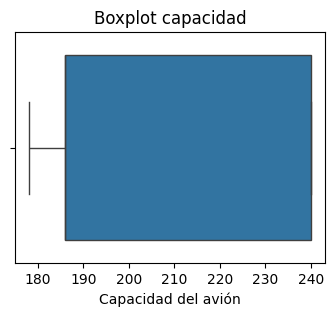

In [ ]:
datos = df["Capacity"]

plt.figure(figsize=(4, 3))
sns.boxplot(x=datos)
plt.title('Boxplot capacidad')
plt.xlabel('Capacidad del avión')
plt.show()

Capacidad de pasajeros.

El siguiente diagrama de cajas y bigotes muestra la distribución de los datos de la variabla objetivo: pasajeros. Esta tiene un rango intercuartílico de 90 pasajeros hasta 275 pasajeros aproximadamente con una gran cantidad de valores atípicos inferiores, más no superiores.

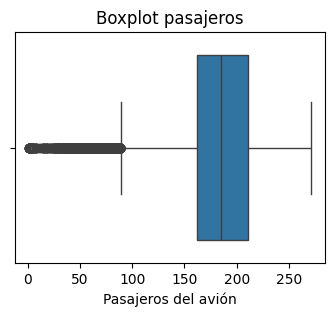

In [ ]:
datos = df["Passengers"]

plt.figure(figsize=(4, 3))
sns.boxplot(x=datos)
plt.title('Boxplot pasajeros')
plt.xlabel('Pasajeros del avión')
plt.show()

Booking

Para la cuestión de bookings o reservas se realizó de igual manera un diagrama de cajas y bigotes y se observa que la disribución de estos datos tiene un rango intercuartílico de 35 reservas hasta 200 reservas aproximadamente. Teniendo datos atípicos inferiores y superiores. La mediana de los datos se encuentra en aproximadamente 110 reservas por avión.

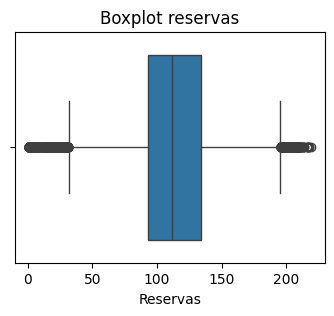

In [ ]:
datos = df["Bookings"]

plt.figure(figsize=(4, 3))
sns.boxplot(x=datos)
plt.title('Boxplot reservas')
plt.xlabel('Reservas')
plt.show()

<hr>

### Correlación

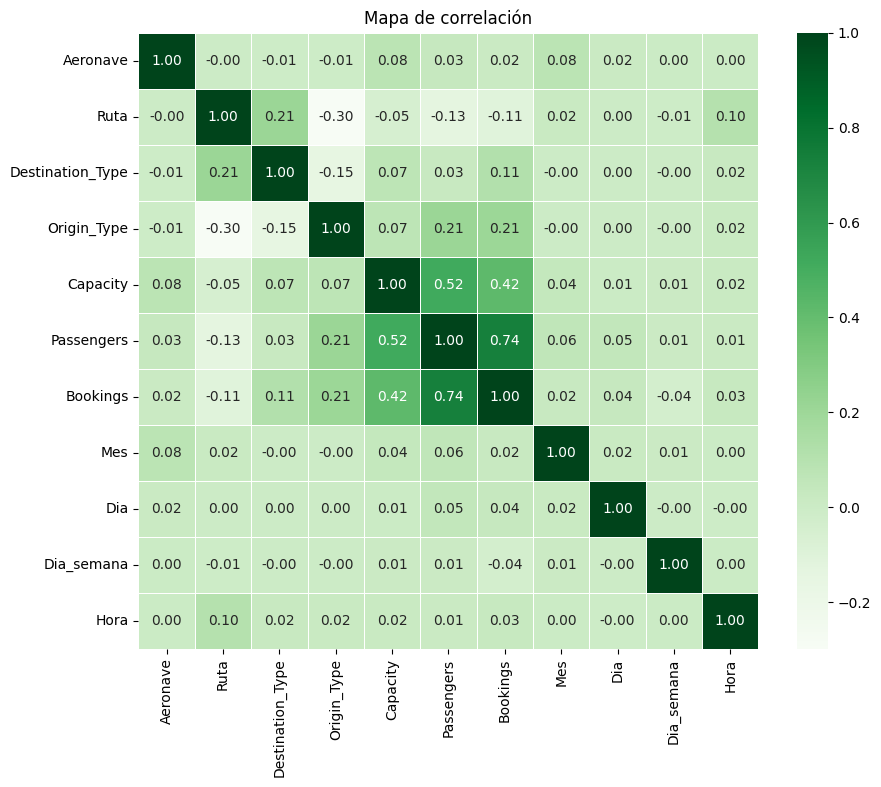

In [ ]:
columnas_numericas = df.select_dtypes(include=["int32",'int64', 'float']).columns.tolist()
df_num = df[columnas_numericas]

correlacion = df_num.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Mapa de correlación')
plt.show()

<hr>

## Modelos

### Train-Test split

In [ ]:
df.head()

,Flight_ID,Aeronave,Ruta,Ruta Str,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Mes,Dia,Dia_semana,Hora
0,ab954014077430bd842cfa305a55c0f8,1,130,0130,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229,157,10,19,3,11
1,efd86c996035dacdca7a0ccb2560dda1,2,236,0236,2,1,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197,109,7,3,0,0
3,dd0fad3248951d2f71d63e6279aeaa4b,3,337,0337,2,4,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200,142,6,26,0,15
4,d0987ee648eea254063bfe2b39571b67,4,423,0423,3,4,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162,90,2,10,4,8
5,3b5df8805161ea827d2f2e4298c38e06,1,515,0515,3,2,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183,125,9,7,3,17


In [ ]:
X=df.drop(['Passengers','Flight_ID','Ruta Str','STD','STA','Bookings'],axis=1)
y=df['Bookings']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0,shuffle=True)

In [ ]:
model_bookings = RandomForestRegressor(n_estimators=500,max_depth=30, criterion='poisson', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 255.72991305548015
Root Mean Squared Error (RMSE): 15.991557555644171
Mean Absolute Error (MAE): 11.991012901928615
R-squared (R2): 0.7210763921028841


### Random Forest

In [ ]:
X=df.drop(['Passengers','Flight_ID','Ruta Str','STD','STA',axis=1)
y=df['Passengers']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0,shuffle=True)

In [ ]:
X=df.drop(['Passengers','Flight_ID','Ruta Str','STD','STA',axis=1)
y=df['Passengers']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0,shuffle=True)

model = RandomForestRegressor(n_estimators=500,max_depth=30, criterion='poisson', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 433.9916349186872
Root Mean Squared Error (RMSE): 20.83246588665603
Mean Absolute Error (MAE): 14.947594845074086
R-squared (R2): 0.6919648716447763


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7eb2bdd1-e0a1-4ac1-a322-350e4de3089d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>